<a href="https://colab.research.google.com/github/itsroot22/genetic-algo-for-logistic-/blob/main/logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.0 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


gen	nevals	avg    	min    
0  	300   	620.953	2.85403
1  	213   	595.762	6.03908
2  	243   	584.304	4.73991
3  	232   	578.619	1.65828
4  	233   	570.898	7.36516
5  	218   	562.839	1.71616
6  	213   	564.809	1.33756
7  	233   	559.852	8.67023
8  	219   	548.127	4.23106
9  	209   	546.942	1.49294
10 	224   	542.123	1.39362
11 	230   	553.579	5.15214
12 	230   	555.246	2.96647
13 	217   	542.703	4.37892
14 	231   	549.721	1.1475 
15 	250   	552.562	2.6533 
16 	238   	549.662	4.02271
17 	236   	544.048	2.74781
18 	225   	534.523	4.83905
19 	225   	521.308	4.69731
20 	209   	509.591	4.69731
21 	232   	509.817	2.48504
22 	237   	504.151	5.70482
23 	217   	494.866	5.29547
24 	227   	475.662	4.2156 
25 	246   	465.411	7.08583
26 	233   	452.355	5.8413 
27 	219   	437.383	4.30696
28 	229   	434.797	0.672615
29 	223   	428.039	0.504037
30 	238   	425.509	1.56714 
31 	225   	415.28 	3.9744  
32 	221   	413.319	3.89973 
33 	243   	399.74 	4.59374 
34 	232   	399.727	4.01944 
35 	244   	390.349	5.

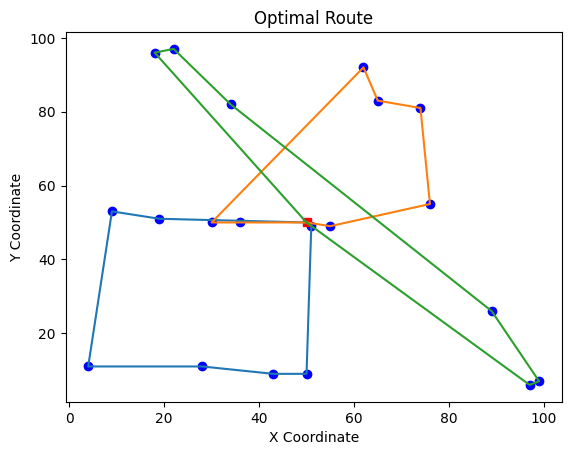

In [ ]:

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


num_locations = 20
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)  #


def plot_routes(individual, title="Routes"):
    plt.figure()

    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')


    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)


    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)


    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
